<a href="https://colab.research.google.com/github/iMan0405/Portfolio_DT_vs_AI/blob/main/Model_identifying_the_type_of_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GPU ni sozlanganligini tekshirish (rasm bilan ishlovchi modellarni training jarayonini tezlashtirish uchun GPU dan foydalanish lozim)

In [2]:
import torch
torch.cuda.is_available()

True

### Model qurish jarayoni

### Kutubxonalarni yuklab olish

In [3]:
from fastai.vision.all import *
from ipywidgets import widgets

### dataframe uchun ma'lumotlarni yuklab olamiz va path o'zgaruvchisiga saqlaymiz
### Quyidagi mashinalarni aniqlovchi model:
### Audi
### Hyundai Creta
### Mahindra Scorpio
### Rolls Royce
### Swift
### Tata Safari
### Toyota Innova

In [4]:
path = Path('/content/drive/MyDrive/Cars Dataset/train')
path.ls()
fls = get_image_files(path)
fls

(#3352) [Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/533.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/578.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/177.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/696.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/61.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/623.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/513.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/48.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/606.jpg'),Path('/content/drive/MyDrive/Cars Dataset/train/Tata Safari/438.jpg')...]

### yuklab olingan file larda xatolik bor yo'qligini tekshirib olamiz

In [5]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

### data loader yaratib olamiz

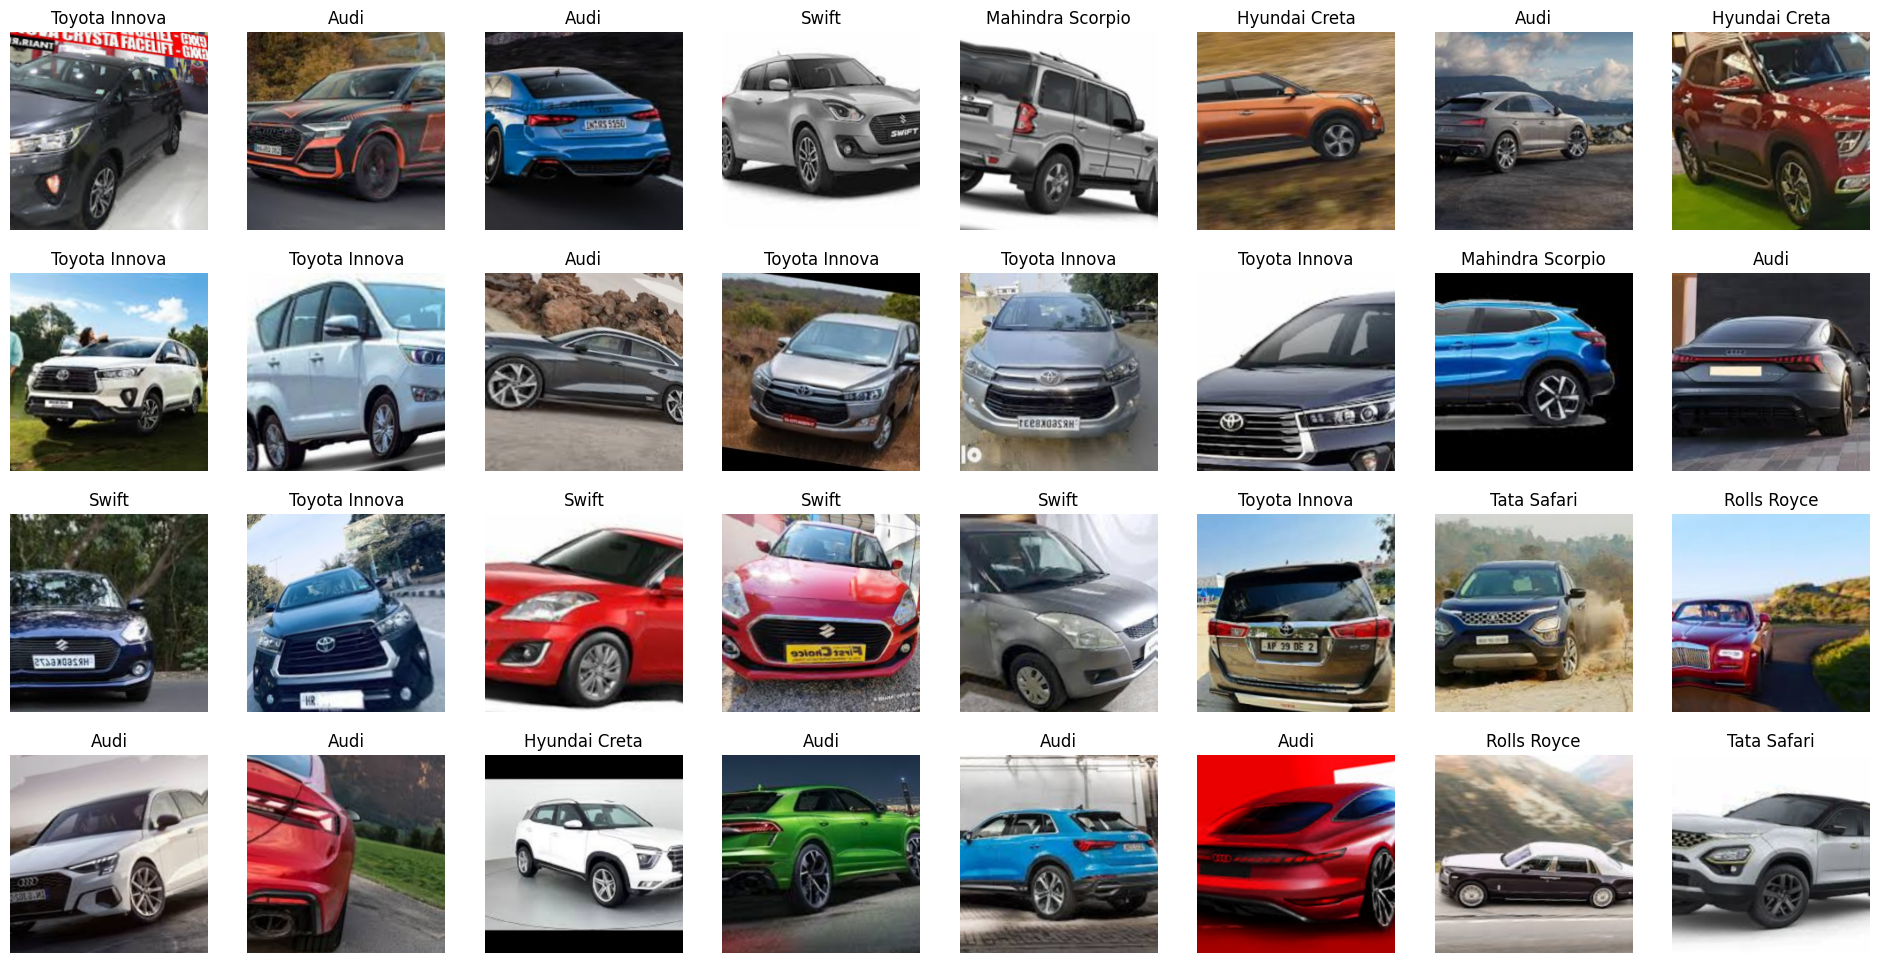

In [8]:
#DataBlock yaratamiz

transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct=0.2),
    item_tfms = Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)

#Dataloader yaratamiz

dls = transports.dataloaders(path)

#Datasetni tekshiramiz

dls.train.show_batch(max_n=32, nrows=4)

### Modelni o'qitamiz

In [9]:
#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 53.0MB/s]


### Model aniqligini tahlil qilamiz

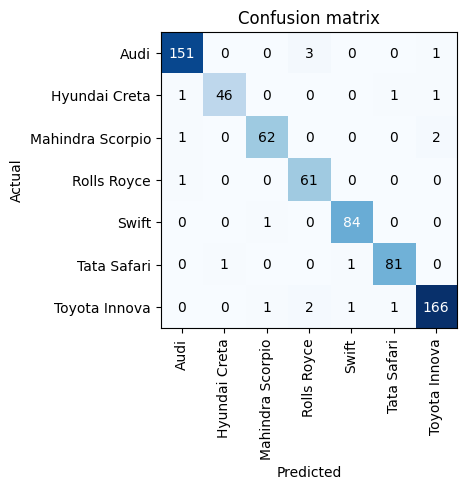

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Noaniq predictionlarni tahlil qilamiz

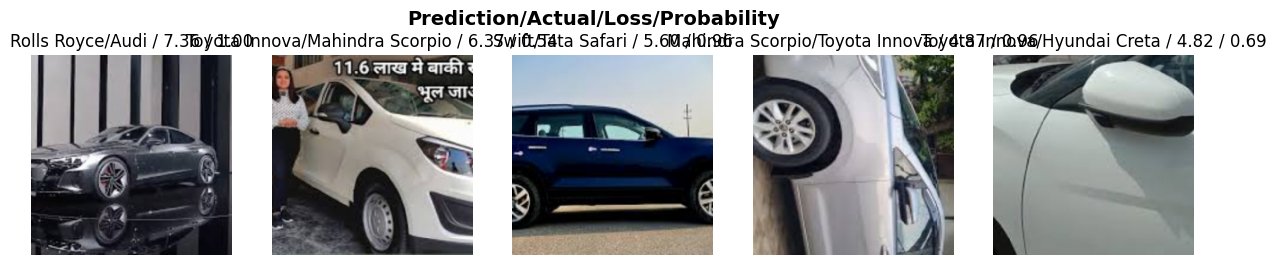

In [11]:
interp.plot_top_losses(5, nrows=1)

### Tekshirib ko'rish uchun biror rasm yuklaymiz

In [12]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

### Predictionni ekran chiqarib natija olamiz

bashorat: Audi
aniqlilik darajasi: 100.0%


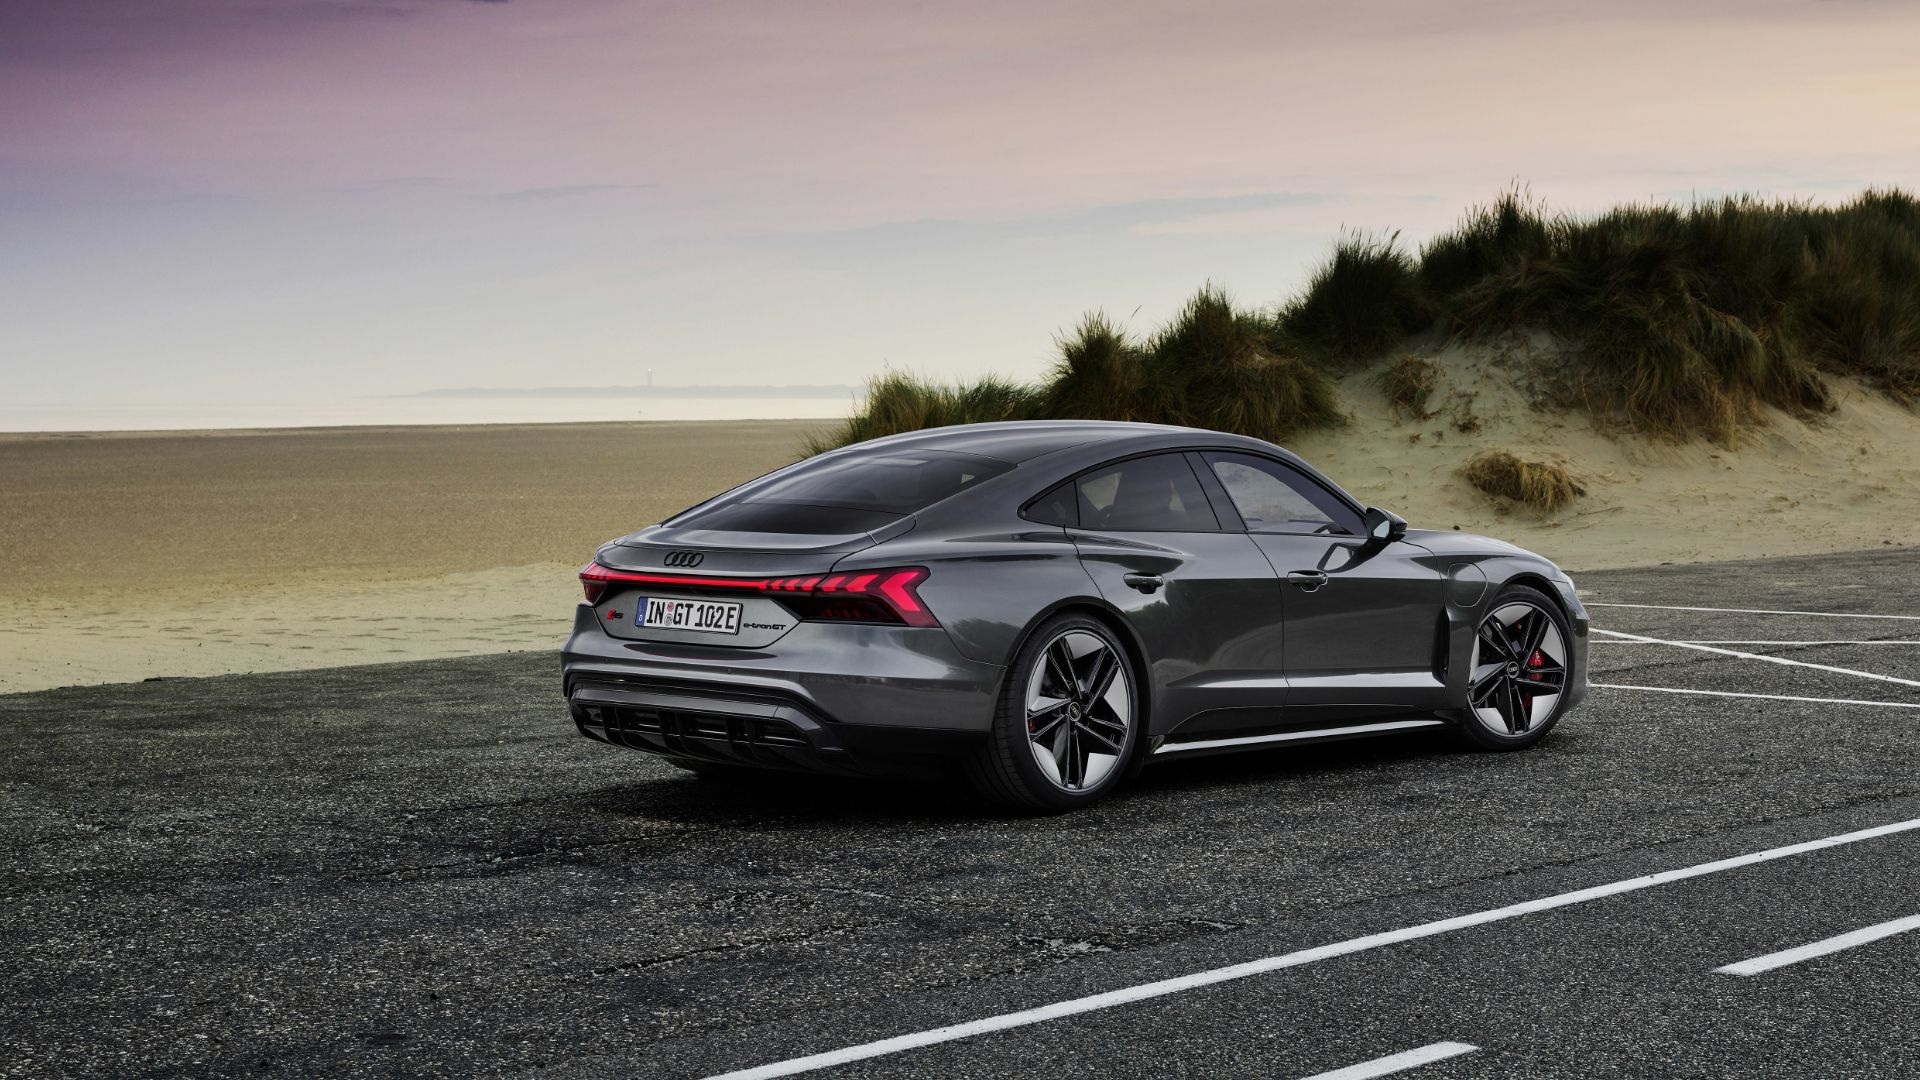

In [13]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"bashorat: {pred}")
print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
img

In [17]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Rolls Royce
aniqlilik darajasi: 100.0%


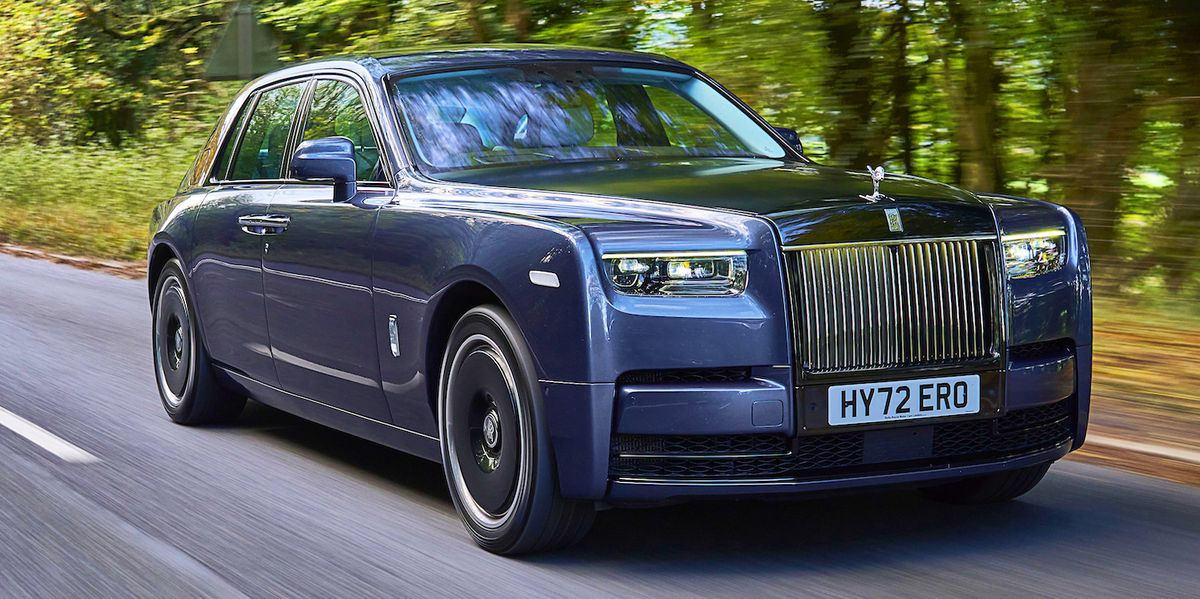

In [18]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"bashorat: {pred}")
print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
img